In [7]:
import os

import matplotlib.pyplot as plt
import numpy as np
from simbig import forwardmodel as simbig_fm
from simbig import util as simbig_ut

import galactic_wavelets as gw

In [8]:
dat_dir = '/mnt/home/chahn/ceph/simbig_cmass/v4/train/'
os.environ['QUIJOTE_DIR'] = "/mnt/home/chahn/ceph/"

In [9]:
i_lhc = np.random.randint(0, 2518)
i_hod = np.random.randint(0, 10)

# read galaxy catalog
fgal = os.path.join(dat_dir, f'hod.quijote_LH{i_lhc}.z0p5.cmass_sgc.v4.{i_hod}.hdf5')
gals = simbig_ut.rh5_hodcatalog(fgal)

# construct corresponding randoms
rand = simbig_fm.BOSS_randoms(gals, veto=True, sample='cmass-south')

In [10]:
kc = 4/3*np.pi
J = 6
Q = 2
angular_width = np.pi/4
scattering = True
kmax = 0.5
box_size = (680, 1395, 1094)
box_center = (1208, 36, 373)
los = (0.965038, 0.025270, 0.260889)

device = 0

In [11]:
wst_op = gw.GalaxyCatalogScatteringOp(J=J,
                                      Q=Q,
                                      kc=kc,
                                      angular_width=angular_width,
                                      scattering=scattering,
                                      kmax=kmax,
                                      box_size=box_size,
                                      box_center=box_center,
                                      los=los,
                                      los_auto_detection=False,
                                      device=device)

Auto-adjustement of box_size changed box_size to [  678.58401318  1394.86713819  1093.27424345] and grid_size to (108, 222, 174).
Computing wavelets...


Done!


In [12]:
s0, s1, s2 = wst_op(gals, randoms=rand)

Create mesh from catalog...
Done!
Computing statistics...
Computing S0 coefficients...
Computing S1 coefficients...
Computing S2 coefficients...
Done!


In [13]:
simbig_wst_dir = '/mnt/home/bregaldosaintblancard/ceph/simbig/cmass_raw/v16/train/'
simbig_wst_fname = f'wm.quijote_LH{i_lhc}.z0p5.cmass_sgc.{i_hod}.npz'

simbig_wst = np.load(os.path.join(simbig_wst_dir, simbig_wst_fname))
s0_ref, s1_ref, s2_ref = simbig_wst['S0'], simbig_wst['S1'], simbig_wst['S2']
s0_new, s1_new, s2_new = s0.cpu().numpy(), s1.cpu().numpy(), s2.cpu().numpy()

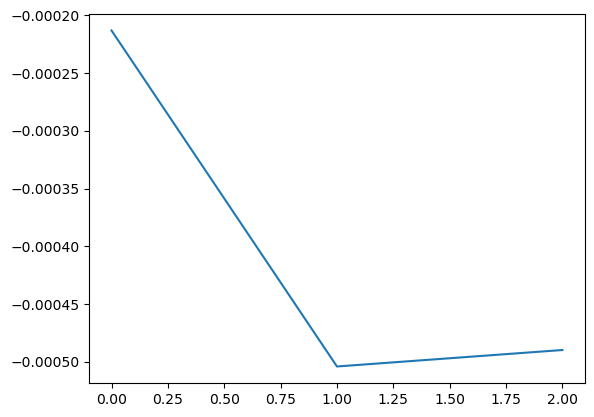

In [14]:
plt.figure()
plt.plot((s0_new.ravel() - s0_ref.ravel())/s0_ref.ravel())

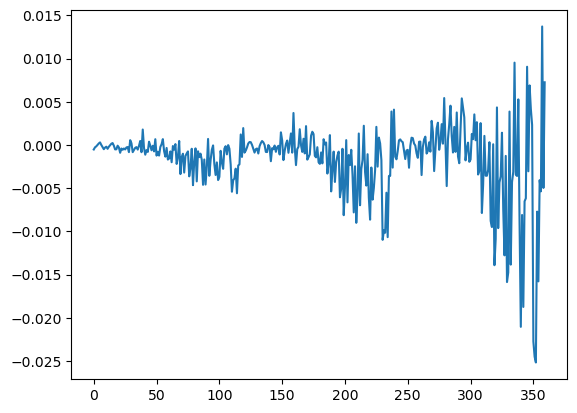

In [15]:
plt.figure()
plt.plot((s1_new.ravel() - s1_ref.ravel())/s1_ref.ravel())

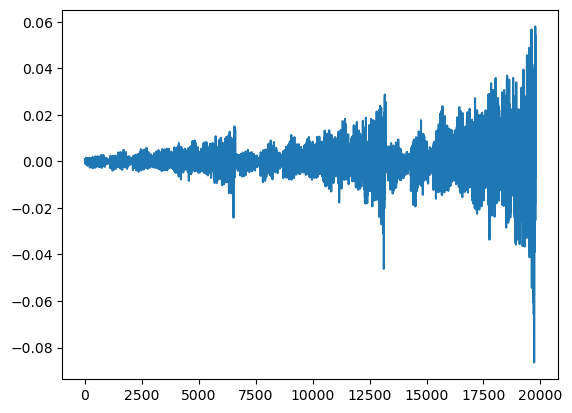

In [16]:
plt.figure()
plt.plot((s2_new.ravel() - s2_ref.ravel())/s2_ref.ravel())